# Clustering con Python

In [98]:
#Colocar precio del vino según los componentes químicos, por tanto, su calidad

## Importar Dataset

In [99]:
import pandas as pd

In [100]:
df = pd.read_csv("datasets/wine/winequality-red.csv", sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [101]:
df.shape

(1599, 12)

In [102]:
import matplotlib.pyplot as plt

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

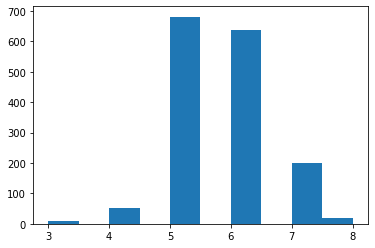

In [103]:
plt.hist(df["quality"])

In [104]:
#De la calidad 3 a la 8 el promedio de los compuestos químicos
df.groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


## Normalización de los datos

In [105]:
df_norm = (df-df.min())/(df.max()-df.min())
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


## Clustering jerárquico con scikit-learn


In [106]:
from sklearn.cluster import AgglomerativeClustering

In [107]:
# "ward", método de ward, varianza mínima es un caso especial del enfoque de función objetivo
clus = AgglomerativeClustering(n_clusters=6, linkage="ward").fit(df_norm)

In [108]:
md_h = pd.Series(clus.labels_) #Las etiquetas a que clase pertenecen
md_h

0       2
1       2
2       2
3       3
4       2
       ..
1594    4
1595    4
1596    4
1597    4
1598    0
Length: 1599, dtype: int64

Text(0, 0.5, 'Número de vinos del cluster')

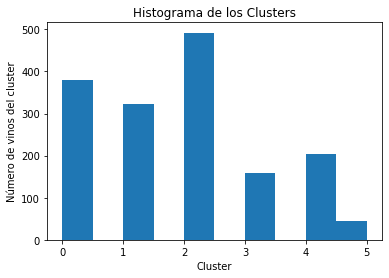

In [109]:
plt.hist(md_h)
plt.title("Histograma de los Clusters")
plt.xlabel("Cluster")
plt.ylabel("Número de vinos del cluster")

In [110]:
clus.children_

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]])

In [111]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [112]:
Z = linkage(df_norm, "ward")

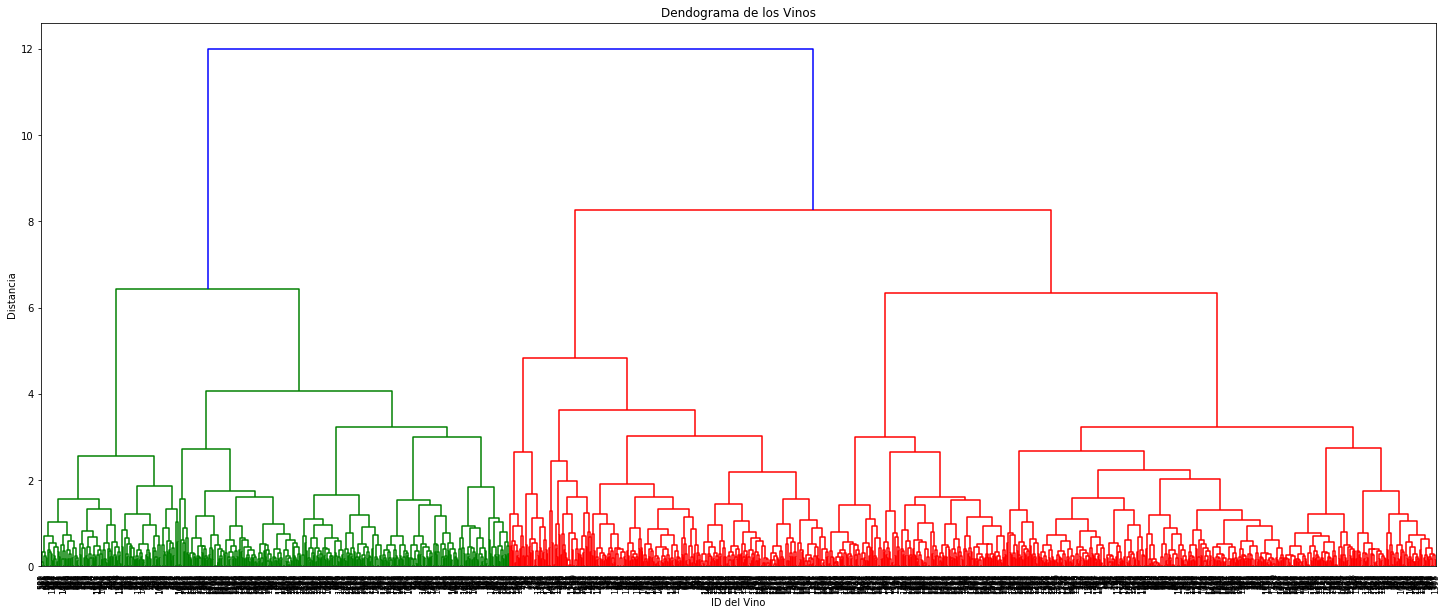

In [113]:
plt.figure(figsize=(25,10))
plt.title("Dendograma de los Vinos")
plt.xlabel("ID del Vino")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()

##  Cluster con K-means

In [114]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [115]:
model = KMeans(n_clusters=6)
model.fit(df_norm)

KMeans(n_clusters=6)

In [116]:
model.labels_

array([4, 4, 4, ..., 0, 4, 5], dtype=int32)

In [117]:
md_k = pd.Series(model.labels_)

In [118]:
df_norm["clust_h"] = md_h
df_norm["clust_k"] = md_k

In [119]:
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h,clust_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,1
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,4


(array([216.,   0., 208.,   0., 285.,   0., 274.,   0., 368., 248.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

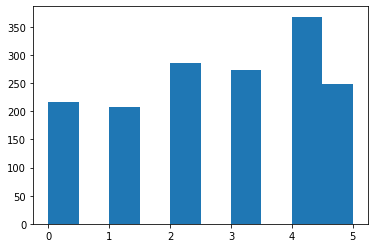

In [120]:
plt.hist(md_k)

In [121]:
model.cluster_centers_ #Varicentro de los clusters

array([[0.17551622, 0.31760528, 0.09634259, 0.09370244, 0.09543684,
        0.24771779, 0.12411661, 0.31965859, 0.57706328, 0.18743069,
        0.49824311, 0.61759259],
       [0.59811096, 0.2053642 , 0.54591346, 0.14070732, 0.16744253,
        0.1492416 , 0.10006116, 0.66863634, 0.31503634, 0.2520152 ,
        0.28895464, 0.55      ],
       [0.33315799, 0.2784031 , 0.28234266, 0.08702941, 0.13831911,
        0.13651138, 0.12706022, 0.51933346, 0.41132096, 0.18617311,
        0.20887574, 0.47832168],
       [0.3182288 , 0.27734727, 0.30693431, 0.16223378, 0.12813936,
        0.40508379, 0.31156019, 0.5409981 , 0.43042704, 0.19058962,
        0.21907168, 0.4540146 ],
       [0.23927564, 0.38379493, 0.06950954, 0.09377216, 0.12089177,
        0.16362206, 0.10592041, 0.48180469, 0.52238838, 0.15363279,
        0.23554112, 0.42997275],
       [0.37796175, 0.15669189, 0.43778226, 0.10572249, 0.10876999,
        0.16276692, 0.08245469, 0.41185579, 0.40967107, 0.23968997,
        0.49888337,

In [123]:
model.inertia_ #Valor de la suma de los cuadrados interno por la sua de los cuadrados totales

188.56504362579352

## Interpretación Final

In [125]:
df_norm.groupby("clust_k").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h
clust_k,,,,,,,,,,,,,
0,0.175516,0.317605,0.096343,0.093702,0.095437,0.247718,0.124117,0.319659,0.577063,0.187431,0.498243,0.617593,3.412037
1,0.598111,0.205364,0.545913,0.140707,0.167443,0.149242,0.100061,0.668636,0.315036,0.252015,0.288955,0.550000,2.572115
2,0.333364,0.278323,0.282632,0.087070,0.138435,0.136595,0.127097,0.518932,0.410720,0.186217,0.209123,0.478596,1.568421
3,0.318229,0.277347,0.306934,0.162234,0.128139,0.405084,0.311560,0.540998,0.430427,0.190590,0.219072,0.454015,1.062044
4,0.239371,0.383571,0.069864,0.093722,0.120849,0.163484,0.105949,0.482217,0.522552,0.153687,0.235277,0.429891,2.125000
5,0.377962,0.156692,0.437782,0.105722,0.108770,0.162767,0.082455,0.411856,0.409671,0.239690,0.498883,0.710484,0.096774
